In [58]:
#importing libraries that will be used

import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [30]:
data = pd.read_parquet("./homework_data/fhv_tripdata_2021-01.parquet")

In [4]:
data.shape

(1154112, 7)

In [5]:
data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [6]:
data.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')

In [7]:
data['duration'] = data.dropOff_datetime - data.pickup_datetime
data.duration = data.duration.apply(lambda td: td.total_seconds() / 60)

#data = data[(data.duration >= 1) & (data.duration <= 60)]


In [8]:
data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [9]:
data["duration"].mean()

19.167224093791006

In [10]:
percent_missing = data.isnull().sum() * 100 / len(data)

In [11]:
percent_missing

dispatching_base_num        0.000000
pickup_datetime             0.000000
dropOff_datetime            0.000000
PUlocationID               83.030676
DOlocationID               14.055828
SR_Flag                   100.000000
Affiliated_base_number      0.076682
duration                    0.000000
dtype: float64

## Data Cleaning

In [12]:
#stat descriptions about the distribution
data.duration.value_counts().describe()

count    10824.000000
mean       106.625277
std        275.193267
min          1.000000
25%          1.000000
50%          4.000000
75%         56.000000
max       5562.000000
Name: duration, dtype: float64

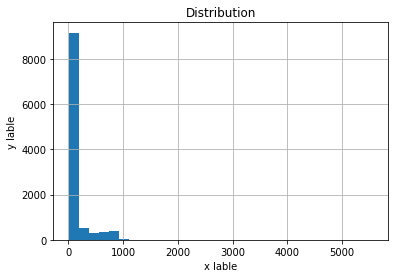

In [13]:
#plotting the ditribution with bins
data['duration'].value_counts().hist(bins = 30)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

Text(0.5, 0, 'Sample')

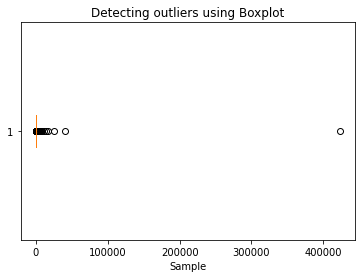

In [14]:
plt.boxplot(data['duration'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

## Dealing with Outliers

In [15]:
#Sorting our dataframe in ascending order
data.sort_values(by=['duration'],ascending=True, inplace=True)

In [16]:
data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
473482,B00221,2021-01-14 07:16:25,2021-01-14 07:16:26,NaN,243.0,None,B00221,0.016667
1095574,B03147,2021-01-30 02:27:20,2021-01-30 02:27:21,92.0,92.0,None,B03147,0.016667
14967,B02657,2021-01-01 14:37:07,2021-01-01 14:37:08,NaN,220.0,None,B02657,0.016667
878721,B02111,2021-01-25 04:55:29,2021-01-25 04:55:30,92.0,92.0,None,B02111,0.016667
126023,B02546,2021-01-05 08:04:15,2021-01-05 08:04:16,NaN,78.0,None,B02546,0.016667
...,...,...,...,...,...,...,...,...
230325,B01985,2021-01-07 15:30:00,2021-01-17 14:04:00,NaN,NaN,None,B01985,14314.000000
10288,B03297,2021-01-01 10:30:00,2021-01-13 11:12:00,NaN,NaN,None,B03297,17322.000000
457454,B02546,2021-01-13 15:26:07,2021-01-31 17:03:15,NaN,168.0,None,B02546,26017.133333
1153556,B00856,2021-01-31 23:47:00,2021-03-01 00:14:36,NaN,76.0,None,B02875,40347.600000


In [17]:
data = data[(data.duration >= 1) & (data.duration <= 60)]

In [18]:
data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1030286,B02782,2021-01-28 13:41:00,2021-01-28 13:42:00,NaN,NaN,None,B02782,1.0
41822,B02534,2021-01-02 15:25:00,2021-01-02 15:26:00,260.0,20.0,None,B02534,1.0
469708,B00419,2021-01-14 01:50:04,2021-01-14 01:51:04,248.0,248.0,None,B00419,1.0
303099,B02534,2021-01-09 14:30:00,2021-01-09 14:31:00,47.0,247.0,None,B02534,1.0
463598,B02534,2021-01-13 18:58:00,2021-01-13 18:59:00,242.0,248.0,None,B02534,1.0
...,...,...,...,...,...,...,...,...
228859,B03283,2021-01-07 14:00:00,2021-01-07 15:00:00,NaN,NaN,None,None,60.0
627961,B02531,2021-01-18 11:15:00,2021-01-18 12:15:00,171.0,92.0,None,B02531,60.0
886355,B02531,2021-01-25 08:30:00,2021-01-25 09:30:00,92.0,171.0,None,B02531,60.0
735902,B02794,2021-01-21 06:56:55,2021-01-21 07:56:55,NaN,65.0,None,B02835,60.0


### Since our data had outliers we had to delete duration that was outside 1 and 60 minutes, we removed 44,286 entries

## Replacing missing values in ID columns with -1

In [19]:
#Replacing missing values in PickUplocationID
data['PUlocationID'].fillna(-1, inplace=True)

/tmp/ipykernel_55908/1258709630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PUlocationID'].fillna(-1, inplace=True)


In [20]:
#Replacing missing values in DOlocationID
data['DOlocationID'].fillna(-1, inplace=True)

/tmp/ipykernel_55908/1325688005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DOlocationID'].fillna(-1, inplace=True)


In [21]:
data

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1030286,B02782,2021-01-28 13:41:00,2021-01-28 13:42:00,-1.0,-1.0,None,B02782,1.0
41822,B02534,2021-01-02 15:25:00,2021-01-02 15:26:00,260.0,20.0,None,B02534,1.0
469708,B00419,2021-01-14 01:50:04,2021-01-14 01:51:04,248.0,248.0,None,B00419,1.0
303099,B02534,2021-01-09 14:30:00,2021-01-09 14:31:00,47.0,247.0,None,B02534,1.0
463598,B02534,2021-01-13 18:58:00,2021-01-13 18:59:00,242.0,248.0,None,B02534,1.0
...,...,...,...,...,...,...,...,...
228859,B03283,2021-01-07 14:00:00,2021-01-07 15:00:00,-1.0,-1.0,None,None,60.0
627961,B02531,2021-01-18 11:15:00,2021-01-18 12:15:00,171.0,92.0,None,B02531,60.0
886355,B02531,2021-01-25 08:30:00,2021-01-25 09:30:00,92.0,171.0,None,B02531,60.0
735902,B02794,2021-01-21 06:56:55,2021-01-21 07:56:55,-1.0,65.0,None,B02835,60.0


## Modelling

In [34]:
 df_val = pd.read_parquet("./homework_data/fhv_tripdata_2021-02.parquet")
 df_train= data

In [45]:

df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

df_val1 = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

df_val1

/tmp/ipykernel_55908/1731139295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
/tmp/ipykernel_55908/1731139295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,PU_DO,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,173.0_82.0,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,173.0_56.0,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,82.0_129.0,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,nan,225.0,None,B00037,nan_225.0,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,nan,61.0,None,B00037,nan_61.0,8.966667
...,...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,nan,31.0,None,B01717,nan_31.0,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,nan,169.0,None,B01717,nan_169.0,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285,28.0_171.0,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285,16.0_252.0,18.050000


In [46]:
    categorical = ['PUlocationID', 'DOlocationID']
    df_train[categorical] = df_train[categorical].astype(str)
    df_val1[categorical] = df_val1[categorical].astype(str)

/tmp/ipykernel_55908/2903774527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[categorical] = df_train[categorical].astype(str)


In [47]:
df_train['PU_DO'] = data['PUlocationID'] + '_' + data['DOlocationID']
df_val1['PU_DO'] = df_val1['PUlocationID'] + '_' + df_val1['DOlocationID']

/tmp/ipykernel_55908/187026301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['PU_DO'] = data['PUlocationID'] + '_' + data['DOlocationID']


In [48]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']


dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val1[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [49]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

15.481981316586687